In [4]:
from astropy.wcs import WCS
import numpy
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import os

screen_width_metres = 200e3
frequency = 1e8
rate = 1.0/60.0
num_times = 240
# num_pix = int(screen_width_metres / pscale)

num_pix = 1000
pscale = 200
fln = "pixel_%d_step_6_scale_%d.npy"%(num_pix,pscale)


npy_filename = os.path.join("../results/arch_python",fln)
fits_filename = fln[:-3] + "fits"

w = WCS(naxis=4)
w.naxis = 4
w.wcs.cdelt = [pscale, pscale, 1.0 / rate, 1.0]
w.wcs.ctype = ['XX', 'YY', 'TIME', 'FREQ']
w.wcs.crval = [0.0, 0.0, 0.0, frequency]          # Coordinate reference values for each coordinate axis.
data = numpy.zeros([1, num_times, num_pix, num_pix])
tec = numpy.load(npy_filename)


for i in range(num_times):
    data[:, i, ...] += tec[numpy.newaxis, ...]

fits.writeto(filename=fits_filename, data=data,
             header=w.to_header(), overwrite=True)

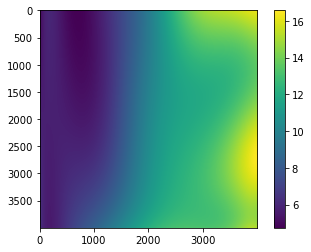

In [8]:
tec = numpy.load("../results/image_npy/pixel_4000_step_5.npy")
plt.imshow(tec)
plt.colorbar()

lon :  [ 70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140.]
lat :  [ -2.5  -5.   -7.5 -10.  -12.5 -15.  -17.5 -20.  -22.5 -25.  -27.5 -30.
 -32.5 -35.  -37.5]


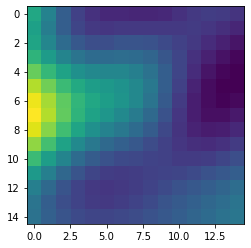

In [29]:
from src.apps.ionox import read_tec_file
from src.apps.make_plot import make_mul_plot, make_plot
from src.apps.spherical_harmonic import (spherical_triangle_transform,
                                         zip_point,
                                         fit_spherical_harmonic,
                                         concat_dataset_allpoint,
                                         concat_dask_workflow)
import os
data_dir = "../data" 
filename = os.path.join(data_dir,"CODG%03d0.22I"%(10))  

tecarray, _, lonarray, latarray, _ = read_tec_file(filename)    
tec_dataset = tecarray[21][50:65,36:51]
print ("lon : ",lonarray[50:65])
print ("lat : ",latarray[36:51])
plt.imshow(tec_dataset)

In [1]:
filename_1 = "../test_screen_60s_1.fits"
filename_2 = "../test_screen_60s.fits"

In [2]:
from astropy.wcs import WCS
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import os

In [40]:
fits_cube = np.zeros((1,240,2000,2000))
for i in range (4):
    for j in range (60):
        utctime = i+19 + j/100
        npy_dir = "../results/image_npy"
        filename = "pixel_2000_step_5_scale_100_utctime_%.2f.npy"%utctime
        file_path = os.path.join(npy_dir,filename)
        fits_cube[0][i*60+j] = np.load(file_path)


In [48]:
screen_width_metres = 200e3
frequency = 1e8
rate = 1.0/60.0
num_times = 240
# num_pix = int(screen_width_metres / pscale)

num_pix = 2000
pscale = 100
fln = "pixel_%d_step_5_scale_%d_timerange_19_22.fits"%(num_pix,pscale)

output_path = os.path.join("../results",fln)
w = WCS(naxis=4)
w.naxis = 4
w.wcs.cdelt = [pscale, pscale, 1.0 / rate, 1.0]
w.wcs.crpix = [num_pix // 2 + 1, num_pix // 2 + 1, num_times // 2 + 1, 1.0]
w.wcs.ctype = ['XX', 'YY', 'TIME', 'FREQ']
w.wcs.crval = [0.0, 0.0, 0.0, frequency]          # Coordinate reference values for each coordinate axis.

fits.writeto(filename=output_path, data=fits_cube,
             header=w.to_header(), overwrite=True)